<a href="https://colab.research.google.com/github/Debasish06/Deep-Learning/blob/main/ANNvsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.layers import Flatten,Dense, Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_fig(index):
  plt.figure(figsize=(10,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y_train[index][0]])

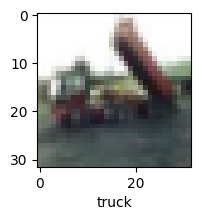

In [10]:
plot_fig(2)

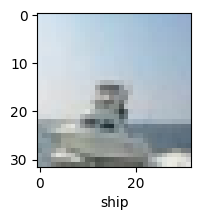

In [11]:
plot_fig(100)

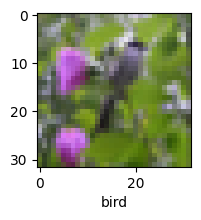

In [12]:
plot_fig(300)

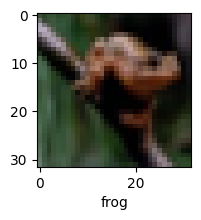

In [13]:
plot_fig(5000)

### Normalizing training data

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
model = Sequential(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8534 - accuracy: 0.3283 - val_loss: 1.7189 - val_accuracy: 0.3857
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6840 - accuracy: 0.3976 - val_loss: 1.6111 - val_accuracy: 0.4315
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6120 - accuracy: 0.4245 - val_loss: 1.5890 - val_accuracy: 0.4297
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5687 - accuracy: 0.4381 - val_loss: 1.5845 - val_accuracy: 0.4355
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5369 - accuracy: 0.4518 - val_loss: 1.5108 - val_accuracy: 0.4587
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5156 - accuracy: 0.4595 - val_loss: 1.6006 - val_accuracy: 0.4283
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4976 - accuracy: 0.4643 - val_loss: 1.5259 - val_accuracy:

### CNN

In [25]:
model_cnn = Sequential(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(10,activation='softmax'))

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               921728    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

In [26]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model_cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4849 - accuracy: 0.4592 - val_loss: 1.2476 - val_accuracy: 0.5535
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1695 - accuracy: 0.5866 - val_loss: 1.2217 - val_accuracy: 0.5702
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0312 - accuracy: 0.6364 - val_loss: 1.0602 - val_accuracy: 0.6234
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9417 - accuracy: 0.6704 - val_loss: 1.0664 - val_accuracy: 0.6247
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8654 - accuracy: 0.6968 - val_loss: 1.0474 - val_accuracy: 0.6381
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8045 - accuracy: 0.7179 - val_loss: 1.0560 - val_accuracy: 0.6401
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7487 - accuracy: 0.7378 - val_loss: 1.0725 - val_accuracy:

## After 10 epochs
###ANN accuracy --> 0.4792,  validation accuracy -->0.4751
###CNN accuracy --> 0.7900,  validation accuracy --> 0.6312